In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
# Importing the libraries
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
from sklearn.metrics import r2_score
# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from sklearn.decomposition import PCA

C:\Users\laral\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Reading the data
dataset = pd.read_csv(r'E:\wenqu\zonal_statistics\combined_update1.csv')
# Remove rows with NaN values
dataset = dataset.dropna(axis=0)

# Now 'dataset_without_nan' contains the dataset with rows containing NaN values removed.

dataset.head()

,la_ymax,la_std_value,sla_ymax_value,sla_std_mean_value,d13c_ymax_value,d13c_std_value,d15n_ymax_value,d15n_std_value,ldmc_ymax_value,ldmc_std_value,...,mean_temp_driest_quarter_value,mean_temp_wettest_quarter_value,PET_value,precp_coldest_value,precp_warmest_value,precp_seasonality_value,soil_ph_value,voil_water_value,soil_carbon_value,soil_nitrogen_value
0,1.138349,2.851361,4.515089,0.534770,-28.100536,2.812606,0.870116,5.093642,-1.235871,0.756113,...,-205.0,93.0,-0.001099,41.0,139.0,61.0,54.000000,448.000000,2851.000000,1063.000000
1,0.855036,2.900618,4.462237,0.539418,-28.148775,2.863813,1.521652,5.082226,-1.314599,0.810716,...,-196.0,101.0,-0.001099,40.0,136.0,59.0,53.666667,451.333333,2821.333333,1085.333333
2,1.062939,2.792950,4.468578,0.473788,-29.094899,2.764642,0.063880,4.382208,-0.699813,0.799816,...,-196.0,101.0,-0.001099,40.0,136.0,59.0,53.000000,450.000000,2908.000000,1148.000000
3,-0.109422,2.755855,4.463972,0.481723,-29.055893,2.374191,-0.979734,4.523654,-0.948795,0.915393,...,-203.0,93.0,-0.001096,41.0,139.0,61.0,53.000000,450.000000,2840.000000,1128.000000
4,3.991212,3.187670,4.778846,0.627437,-28.741293,2.802890,-6.886267,5.133915,0.399368,1.177771,...,-207.5,91.0,-0.001099,41.0,139.5,61.0,52.250000,448.500000,2920.500000,1133.250000


In [3]:
dataset.shape

(17120, 34)

# VIF

In [3]:
sla_ymax_labels = dataset['sla_ymax_value']
sla_ymax_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value'], axis=1) # Features

In [4]:
def calculate_vif_and_print_dropped(data, threshold=5.0):
    data_vif = data.copy()
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data_vif.columns
    vif_data["VIF"] = [variance_inflation_factor(data_vif.values, i) for i in range(data_vif.shape[1])]
    
    # Keep track of variables removed
    variables_removed = []

    while vif_data["VIF"].max() > threshold:
        # Identify the feature with the maximum VIF
        max_vif_feature = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
        # Drop the feature with the maximum VIF
        data_vif.drop(columns=[max_vif_feature], inplace=True)
        variables_removed.append(max_vif_feature)  # Keep track of the removed variable
        print(f"Dropping '{max_vif_feature}' with VIF={vif_data.loc[vif_data['Feature'] == max_vif_feature, 'VIF'].values[0]:.2f}")
        # Recalculate VIF
        vif_data = pd.DataFrame()
        vif_data["Feature"] = data_vif.columns
        vif_data["VIF"] = [variance_inflation_factor(data_vif.values, i) for i in range(data_vif.shape[1])]

    print("\nVariables removed due to VIF > threshold:", variables_removed)
    return data_vif

# Assuming `data` is your DataFrame of predictors
reduced_data = calculate_vif_and_print_dropped(sla_ymax_features, threshold=20)



Dropping 'annual_precp_value' with VIF=88843.14
Dropping 'mean_temp_coldest_quarter_value' with VIF=42349.80
Dropping 'annual_diurnal_temp_value' with VIF=10744.76
Dropping 'SWI_value' with VIF=4002.57
Dropping 'precp_warmest_value' with VIF=3610.75
Dropping 'precp_seasonality_value' with VIF=2200.74
Dropping 'isothremality_value' with VIF=2146.94
Dropping 'voil_water_value' with VIF=809.40
Dropping 'snow_value' with VIF=555.11
Dropping 'mean_temp_driest_quarter_value' with VIF=349.86
Dropping 'soil_nitrogen_value' with VIF=249.23
Dropping 'mean_temp_wettest_quarter_value' with VIF=113.35
Dropping 'soil_ph_value' with VIF=68.60
Dropping 'soil_carbon_value' with VIF=37.00
Dropping 'precp_coldest_value' with VIF=24.90

Variables removed due to VIF > threshold: ['annual_precp_value', 'mean_temp_coldest_quarter_value', 'annual_diurnal_temp_value', 'SWI_value', 'precp_warmest_value', 'precp_seasonality_value', 'isothremality_value', 'voil_water_value', 'snow_value', 'mean_temp_driest_quarte

In [7]:
reduced_data

,slope_value,RAD_value,TWI_value,AET_value,annual_mean_temp_value,defict_value,PET_value
0,32.042071,2.144406,3.179301,0.271357,-99.0,0.632308,-0.001099
1,23.670947,1.808392,3.981742,0.271583,-92.0,0.871800,-0.001099
2,12.429877,1.252402,3.278767,0.312500,-92.0,0.946000,-0.001099
3,14.317726,0.014420,3.171807,0.265000,-98.0,0.725000,-0.001096
4,6.083298,1.353919,5.094476,0.250429,-101.5,0.616722,-0.001099
...,...,...,...,...,...,...,...
17752,0.677610,0.967326,2.075386,5.744848,-109.0,0.358413,-0.000957
17753,0.594112,0.960732,1.650930,5.682712,-109.0,0.349846,-0.000955
17754,0.865812,0.971890,2.322327,5.642167,-109.0,0.344333,-0.000953
17755,0.628140,0.961394,1.741513,5.734682,-109.0,0.356273,-0.000957


In [4]:
sla_ymax_labels = dataset['sla_ymax_value']
sla_ymax_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value',
                        'annual_precp_value', 
                        'annual_diurnal_temp_value', 
                        'SWI_value', 'precp_warmest_value',
                        'precp_seasonality_value', 'isothremality_value',
                        'mean_temp_driest_quarter_value',
                        'mean_temp_wettest_quarter_value', 
                        'precp_coldest_value'
                        ], axis=1) # Features

In [5]:
sla_ymax_features.shape

(17120, 13)

In [6]:
best_params = {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}

In [7]:
sla_ymax_train_features, sla_ymax_test_features, sla_ymax_train_labels, sla_ymax_test_labels = train_test_split(
    sla_ymax_features, sla_ymax_labels, test_size = 0.25, random_state = 42)


rf_ymax = RandomForestRegressor(**best_params)
# Train the Random Forest model with the best parameters
rf_ymax.fit(sla_ymax_train_features, sla_ymax_train_labels)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=10,
                      n_estimators=500)

In [8]:
# Assuming rf_ymax is your trained Random Forest model
feature_importances = rf_ymax.feature_importances_

# Get the names of the features
feature_names = sla_ymax_features.columns

# Combine feature names with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or inspect the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: slope_value, Importance: 0.11139908073066992
Feature: PET_value, Importance: 0.09740369813867922
Feature: AET_value, Importance: 0.08559249450423331
Feature: mean_temp_coldest_quarter_value, Importance: 0.08220399495286362
Feature: soil_carbon_value, Importance: 0.07982586906608631
Feature: RAD_value, Importance: 0.07712815273795091
Feature: defict_value, Importance: 0.07680314933343521
Feature: TWI_value, Importance: 0.07526683646825155
Feature: annual_mean_temp_value, Importance: 0.06945699762197416
Feature: voil_water_value, Importance: 0.0654491262675943
Feature: soil_nitrogen_value, Importance: 0.06396303814798061
Feature: soil_ph_value, Importance: 0.058596954608901866
Feature: snow_value, Importance: 0.056910607421379086


Mean Squared Error: 0.003352012080625817
R-squared: 0.5564930396931572


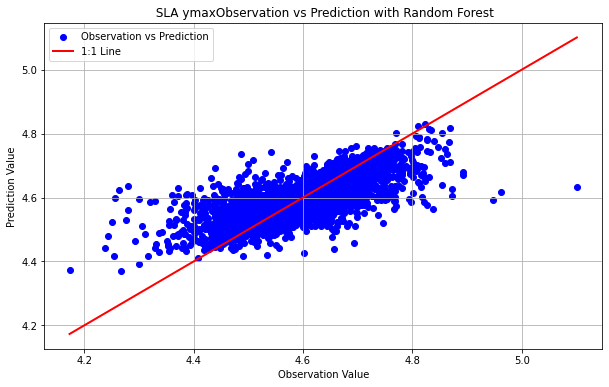

In [9]:
# Make predictions on the test set
predictions = rf_ymax.predict(sla_ymax_test_features)
# Calculate mean squared error and R-squared
mse = mean_squared_error(sla_ymax_test_labels, predictions)
r2 = r2_score(sla_ymax_test_labels, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
# Plot the observation values against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(sla_ymax_test_labels, predictions, color='blue', label='Observation vs Prediction')
# Plot the trend line (perfect predictions)
max_val = max(sla_ymax_test_labels.max(), predictions.max())
min_val = min(sla_ymax_test_labels.min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='1:1 Line')
# Add labels, title, and legend
plt.title(' SLA ymaxObservation vs Prediction with Random Forest')
plt.xlabel('Observation Value')
plt.ylabel('Prediction Value')
plt.legend()
# Show plot
plt.grid()
plt.show()

### SLA STD

In [12]:
sla_std_labels = dataset['sla_std_mean_value']
sla_std_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value',
                        'annual_precp_value', 
                        'annual_diurnal_temp_value', 
                        'SWI_value', 'precp_warmest_value',
                        'precp_seasonality_value', 'isothremality_value',
                        'mean_temp_driest_quarter_value',
                        'mean_temp_wettest_quarter_value', 
                        'precp_coldest_value'
                        ], axis=1) # Features

In [13]:
# Assuming `data` is your DataFrame of predictors
# reduced_data = calculate_vif_and_print_dropped(sla_std_features, threshold=20)

In [14]:
# sla_std_labels = dataset['sla_std_mean_value']
# sla_std_features = dataset.drop(['la_ymax','la_std_value', 
#                          'sla_ymax_value','sla_std_mean_value',
#                          'd13c_ymax_value', 'd13c_std_value', 
#                          'd15n_ymax_value', 'd15n_std_value',
#                         'ldmc_ymax_value', 'ldmc_std_value',
#                         'pc_ymax_value', 'pc_std_value',
#                         'annual_precp_value', 'mean_temp_coldest_quarter_value',
#                         'annual_diurnal_temp_value', 'SWI_value',
#                         'precp_warmest_value', 'isothremality_value',
#                         'precp_seasonality_value', 'snow_value',
#                         'mean_temp_driest_quarter_value',
#                         'mean_temp_wettest_quarter_value',
#                         'precp_coldest_value'], axis=1) # Features
sla_std_train_features, sla_std_test_features, sla_std_train_labels, sla_std_test_labels = train_test_split(
    sla_std_features, sla_std_labels, test_size = 0.25, random_state = 42)


rf_std = RandomForestRegressor(**best_params)
# Train the Random Forest model with the best parameters
rf_std.fit(sla_std_train_features, sla_std_train_labels)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=10,
                      n_estimators=500)

In [15]:
# Assuming rf_ymax is your trained Random Forest model
feature_importances = rf_std.feature_importances_

# Get the names of the features
feature_names = sla_std_features.columns

# Combine feature names with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or inspect the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: PET_value, Importance: 0.11686706833356277
Feature: RAD_value, Importance: 0.0949384689766082
Feature: slope_value, Importance: 0.09287703423662476
Feature: snow_value, Importance: 0.08512840118642594
Feature: soil_carbon_value, Importance: 0.08501527305143447
Feature: defict_value, Importance: 0.07376516965362032
Feature: AET_value, Importance: 0.0733487530849505
Feature: mean_temp_coldest_quarter_value, Importance: 0.0690128082636682
Feature: annual_mean_temp_value, Importance: 0.06631128480444126
Feature: voil_water_value, Importance: 0.06623566410778053
Feature: soil_nitrogen_value, Importance: 0.06239157614934317
Feature: TWI_value, Importance: 0.05877630337647463
Feature: soil_ph_value, Importance: 0.0553321947750654


Mean Squared Error: 0.0022514653963202377
R-squared: 0.5260232880710698


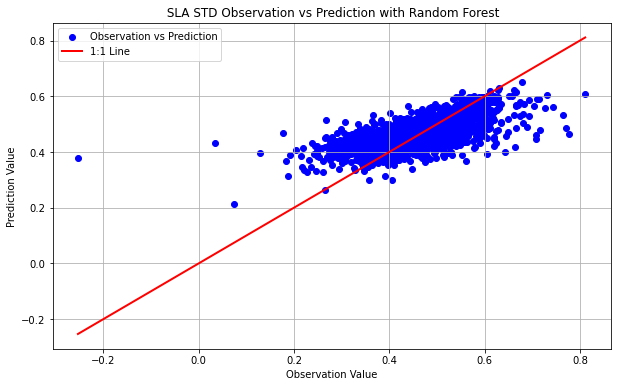

In [16]:
# Make predictions on the test set
predictions = rf_std.predict(sla_std_test_features)
# Calculate mean squared error and R-squared
mse = mean_squared_error(sla_std_test_labels, predictions)
r2 = r2_score(sla_std_test_labels, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
# Plot the observation values against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(sla_std_test_labels, predictions, color='blue', label='Observation vs Prediction')
# Plot the trend line (perfect predictions)
max_val = max(sla_std_test_labels.max(), predictions.max())
min_val = min(sla_std_test_labels.min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='1:1 Line')
# Add labels, title, and legend
plt.title(' SLA STD Observation vs Prediction with Random Forest')
plt.xlabel('Observation Value')
plt.ylabel('Prediction Value')
plt.legend()
# Show plot
plt.grid()
plt.show()

# Variable Importance

In [21]:
sla_ymax_labels = dataset['sla_ymax_value']
sla_ymax_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value','annual_precp_value', 
                        'snow_value', 'precp_warmest_value' , 'mean_temp_coldest_quarter_value', 
                        'mean_temp_driest_quarter_value','annual_mean_temp_value', 'precp_coldest_value', 
                        'annual_diurnal_temp_value','mean_temp_wettest_quarter_value','precp_seasonality_value',
                        'isothremality_value' ], axis=1) # Features
sla_ymax_train_features, sla_ymax_test_features, sla_ymax_train_labels, sla_ymax_test_labels = train_test_split(
    sla_ymax_features, sla_ymax_labels, test_size = 0.25, random_state = 42)


rf_ymax = RandomForestRegressor(**best_params)
# Train the Random Forest model with the best parameters
rf_ymax.fit(sla_ymax_train_features, sla_ymax_train_labels)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=10,
                      n_estimators=500)

In [22]:
# Assuming rf_ymax is your trained Random Forest model
feature_importances = rf_ymax.feature_importances_

# Get the names of the features
feature_names = sla_ymax_features.columns

# Combine feature names with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or inspect the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: SWI_value, Importance: 0.17223788542162896
Feature: slope_value, Importance: 0.16935273964857914
Feature: PET_value, Importance: 0.15743438228423937
Feature: AET_value, Importance: 0.13644027735412026
Feature: defict_value, Importance: 0.12570789057317833
Feature: TWI_value, Importance: 0.12299697258944967
Feature: RAD_value, Importance: 0.11582985212880421


Mean Squared Error: 0.003777097278988306
R-squared: 0.5002497327889706


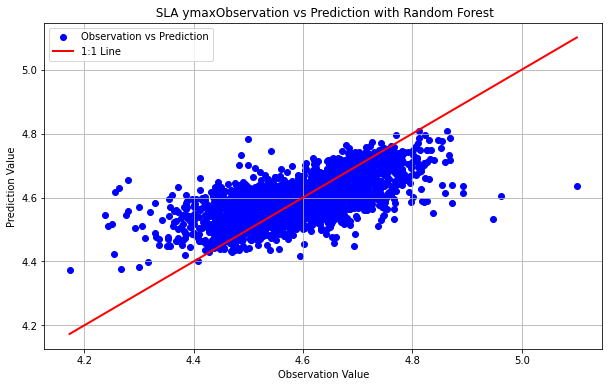

In [23]:
# Make predictions on the test set
predictions = rf_ymax.predict(sla_ymax_test_features)
# Calculate mean squared error and R-squared
mse = mean_squared_error(sla_ymax_test_labels, predictions)
r2 = r2_score(sla_ymax_test_labels, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
# Plot the observation values against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(sla_ymax_test_labels, predictions, color='blue', label='Observation vs Prediction')
# Plot the trend line (perfect predictions)
max_val = max(sla_ymax_test_labels.max(), predictions.max())
min_val = min(sla_ymax_test_labels.min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='1:1 Line')
# Add labels, title, and legend
plt.title(' SLA ymaxObservation vs Prediction with Random Forest')
plt.xlabel('Observation Value')
plt.ylabel('Prediction Value')
plt.legend()
# Show plot
plt.grid()
plt.show()

### SLA STD

In [24]:
sla_std_labels = dataset['sla_std_mean_value']
sla_std_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value',
                        'precp_warmest_value', 'mean_temp_driest_quarter_value', 
                        'mean_temp_wettest_quarter_value', 'mean_temp_coldest_quarter_value', 
                        'annual_diurnal_temp_value', 'annual_mean_temp_value', 
                        'precp_coldest_value', 'precp_seasonality_value', 'isothremality_value',
                        ], axis=1) # Features
sla_std_train_features, sla_std_test_features, sla_std_train_labels, sla_std_test_labels = train_test_split(
    sla_std_features, sla_std_labels, test_size = 0.25, random_state = 42)


rf_std = RandomForestRegressor(**best_params)
# Train the Random Forest model with the best parameters
rf_std.fit(sla_std_train_features, sla_std_train_labels)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=10,
                      n_estimators=500)

In [25]:
# Assuming rf_ymax is your trained Random Forest model
feature_importances = rf_std.feature_importances_

# Get the names of the features
feature_names = sla_std_features.columns

# Combine feature names with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or inspect the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: SWI_value, Importance: 0.13767962178499865
Feature: annual_precp_value, Importance: 0.13451284410553094
Feature: PET_value, Importance: 0.12229895756085239
Feature: slope_value, Importance: 0.11946852758275237
Feature: RAD_value, Importance: 0.11938808313681297
Feature: snow_value, Importance: 0.1088725654344895
Feature: AET_value, Importance: 0.08997256383549411
Feature: defict_value, Importance: 0.08718073905309452
Feature: TWI_value, Importance: 0.08062609750597455


Mean Squared Error: 0.0023701968926656512
R-squared: 0.5010280275033625


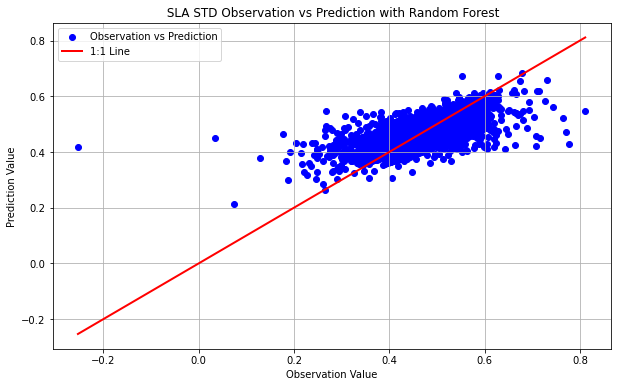

In [26]:
# Make predictions on the test set
predictions = rf_std.predict(sla_std_test_features)
# Calculate mean squared error and R-squared
mse = mean_squared_error(sla_std_test_labels, predictions)
r2 = r2_score(sla_std_test_labels, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
# Plot the observation values against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(sla_std_test_labels, predictions, color='blue', label='Observation vs Prediction')
# Plot the trend line (perfect predictions)
max_val = max(sla_std_test_labels.max(), predictions.max())
min_val = min(sla_std_test_labels.min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='1:1 Line')
# Add labels, title, and legend
plt.title(' SLA STD Observation vs Prediction with Random Forest')
plt.xlabel('Observation Value')
plt.ylabel('Prediction Value')
plt.legend()
# Show plot
plt.grid()
plt.show()